## **2. Installing and Importing the Required Packages**

In [ ]:
!pip install easyocr

!pip install imutils

!pip install opencv-python-headless==4.1.2.30   # If you are using Local Machine Then use "pip install opencv-python"

!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## **3. Covert Colored Image into Grayscale Format**

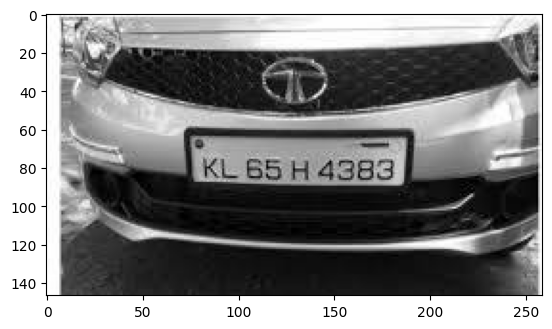

In [ ]:
img = cv2.imread('/content/car.jpeg.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## **4. Apply Filter and Edge Detection**

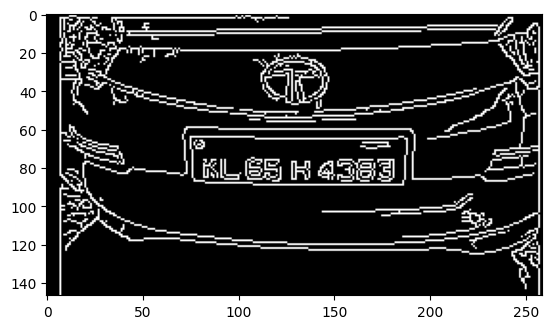

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## **5. Find Contours and Apply Mask**

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[ 75,  64]],

       [[ 77,  87]],

       [[187,  86]],

       [[186,  64]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

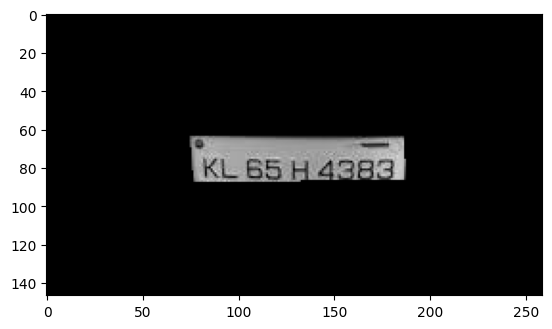

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

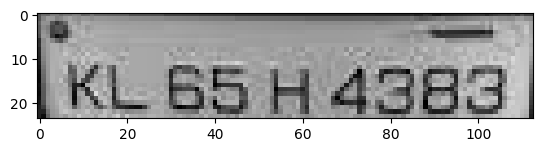

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


## **6. Use Easy OCR To Read Text**

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[3, 7], [111, 7], [111, 24], [3, 24]], 'KL 65 H 4383', 0.9175086596435038)]

## **7. Plot the Result**

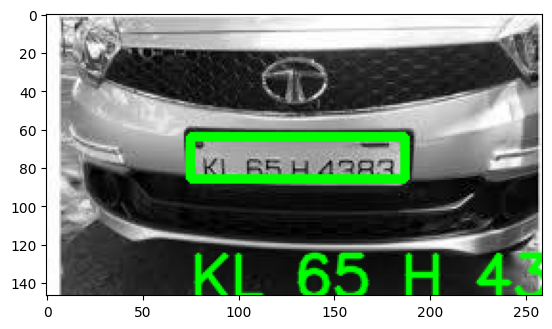

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
input_string =text
output_string = input_string.replace(" ", "")


In [ ]:
import csv
def get_vehicle_details(plate_number, filename):
  with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      if row['plate number'] == plate_number:
        return {
          "state_name": row["state name"],
          "owner_name": row["owner name"],
          "verification": row["verification"],
          "brand": row["brand"],
          "model": row["model"],
          "color": row["color"],
          "ch.no": row["ch.no"]
        }
  return None
# Example usage
plate_number_input =output_string
filename = "/content/data.csv"  # Replace with your actual CSV filename
vehicle_details = get_vehicle_details(plate_number_input, filename)

if vehicle_details:
  print("vehicle plate number:",text)
  print("State name:", vehicle_details["state_name"])
  print("Owner Name:", vehicle_details["owner_name"])
  print("Verification:", vehicle_details["verification"])
  print("Brand:", vehicle_details["brand"])
  print("Model:", vehicle_details["model"])
  print("Color:", vehicle_details["color"])
  print("Chessis no.:", vehicle_details["ch.no"])

else:
  print("Plate number not found in the data.")

vehicle plate number: KL 65 H 4383
State name: kerala
Owner Name: N.V. John Paul
Verification: verified plate
Brand: TATA
Model: Tiago
Color: White
Chessis no.: ML220183B9933
